<div>
<center>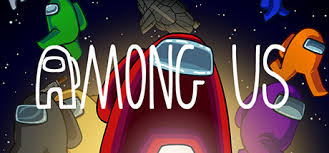</center>
</div>
    
 



  <h1 style='font-family: "Times New Roman"'> WELCOME TO AMONG US EDA, TIPS AND TRICKS </h1> 
  <p> There is a very high chance you have heard of this game if not played it. In case you haven't done either of those- Don't worry. I got you covered </p>
  
  <p style='font-family: "Times New Roman"'>Among Us is a murder mystery puzzler, where you play as a group to complete basic tasks around a spaceship. None of these tasks are particularly difficult - though card swiping can be frustrating - but they’re hampered by the presence of an ‘Impostor’ - or 'Imposter' depending on who you're talking to. There will be between one and three Impostors each game, and a full crew can be up to ten</p>
  
  
  <p style='font-family: "Times New Roman"'>The basic overview of Among Us is simple. A crew of 4-10 (usually 10) players are at a location doing tasks while 1-3 impostors (usually 2) are doing everything they can to sabotage their efforts and kill them all. The game ends in one of four ways.
    <ul>
        <li> All impostors are dead. (Crew Win) </li>
        <li> All tasks are completed. (Crew Win) </li>
        <li> There are an equal number of crew and impostors. (Impostor Win)</li>
        <li> The crew fail to stop a catastrophic sabotage (Impostor Win) </li>
    </ul>
Games can be longer or shorter based on the number of players, their skills, and the options selected by the play group. When a game starts, you will be assigned a role, either as crew or impostors, and your goals and how you achieve them will change based on that.</p>

<h2><strong><center>Dataset Description</center></strong></h2>
<ol>
  <li>Game Completed Date - Date and Time of game completion</li>
  <li> Team - player is an imposter or crewmate</li>
  <li>Outcome - Fine result of the game - win/loss</li>
  <li>Task Completed - The number of tasks completed by the crewmate</li>
  <li>All Tasks Completed - Boolean Variable showcasing if all the tasks are completed by the crewmate</li>
    <li>Murdered - Crewmate is mudered or not</li>
    <li>Imposter Kills - Number of kills by the imposter</li>
    <li> Game Lengh - Total duration of the game </li>
    <li>  Ejected - The player is ejected by the fellow players or not </li>
    <li> Sabotages Fixed - Number of sabotages fixed by the crewmates </li>
    <li> Time to complete all tasks - Duration taken by the crewmates to complete the tasks </li>
    <li> Rank Change - Change in rank after the win/loss of the game </li>
    <li> Region/Game Code - Server and the game code </li>
</ol>


(Source: https://www.kaggle.com/nitishabharathi/among-us-the-game-of-covid-era)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


<h2 style='font-family: "Times New Roman"'> First let's get merge the dataset </h2>

In [ ]:
import pandas as pd
import os



files = os.listdir('../input/among-us-dataset')
df = pd.concat([pd.read_csv('../input/among-us-dataset/' + f) for f in files ])
df= df.reset_index(drop=True)
df.head(5)



<h2 style='font-family: "Times New Roman";text-align:"justify'> Get randomized colors </h2>

In [ ]:
custom_colors = ["#6b2fbb","#132ed1","#3f47fe","#d6e0f0","#117f2d","#50ef39","#38fedc","#71491e","#c51111","#ed54ba","#ef7d0d","#f5f557"]



 <h2 style='font-family: "Times New Roman"'> Two of our columns are having data related to time in a format which makes interpretation harder( For eg 2m 1s)

</h2>
    <br> <h2  style='font-family: "Times New Roman"'> We are going to convert them to seconds </h2>


In [ ]:
def convertToMinute(col_name):
    for index, row in df.iterrows():
        if(df[col_name][index]=='-'): pass
        else:
            df[col_name][index]= int(df[col_name][index].split(' ')[0].split('m')[0])*60 + int(df[col_name][index].split(' ')[1].split('s')[0])

In [ ]:
convertToMinute('Game Length')
convertToMinute('Time to complete all tasks')

In [ ]:
df.head(5)


 <h1 style='font-family: "Times New Roman"'> Let's split the column Region/GameCode into 2 seperate columns

</h1>


In [ ]:
df[['Region','Game Code']] = df['Region/Game Code'].str.split("/",expand=True)
df = df.drop(columns=['Region/Game Code'])

In [ ]:
df['Region']=df['Region'].str.strip()

<h1 style='font-family: "Times New Roman"'>Lets see the distribution of region here <h2>

In [ ]:
df['Region'].value_counts()

<h1> HOW LONG DOES THE GAME LAST YOU ASK? </h1>

In [ ]:
import matplotlib.pyplot as plt  
data= {'All Region Mean':df['Game Length'].mean(), 'Europe':df['Game Length'].loc[df['Region']=='Europe'].mean()
, 'North America':df['Game Length'].loc[df['Region']=='NA'].mean()}

countries = list(data.keys()) 
meanTime = list(data.values()) 
   
fig = plt.figure(figsize = (3, 6)) 
  
# creating the bar plot 
plt.bar(countries, meanTime, color = [custom_colors[0],custom_colors[1],custom_colors[2]],  
        width = 0.4) 
  
plt.xlabel("Region") 
plt.ylabel("Average Game Length(In secs)") 
plt.title("Game length in different regions") 
plt.show() 

<h1 style='font-family: "Times New Roman"'> Okay so if you are new to the game and see that the first few matches you are just a crewmate- dont worry. Thats how the game is supposed to be. Since there are 7 crewmate and 2 imposters in a match generally, the chances of you being an imposter are really really less
 </h1>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax1.axis('equal')
Label = ['Imposter', 'Crewmate']
V = [df['Team'].loc[df['Team']=='Imposter'].shape[0],df['Team'].loc[df['Team']=='Crewmate'].shape[0]]
ax1.pie(V, labels = Label,autopct='%1.2f%%')


<h1 style='font-family: "Times New Roman"'> WHO HAS A MORE CHANCE OF WINNING?
 </h1> 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[df['Team'].loc[(df['Team']=='Imposter') & (df['Outcome']=='Loss')].shape[0],df['Team'].loc[(df['Team']=='Crewmate') & (df['Outcome']=='Loss')].shape[0]] ,
        [df['Team'].loc[(df['Team']=='Imposter') & (df['Outcome']=='Win')].shape[0],df['Team'].loc[(df['Team']=='Crewmate') & (df['Outcome']=='Win')].shape[0]]
]

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rec1 = ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,label='Loss')
rec2 = ax.bar(X + 0.25, data[1], color = 'g', width = 0.25,label='Win')

ax.set_ylabel('Number of Matches')
ax.set_title('Imposter and Crewmate Win vs Loss')
ax.set_xticks(X)
ax.set_xticklabels(('Imposter', 'Crewmate'))
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rec1)
autolabel(rec2)

> <h1> TIPS FOR CREWMATE</h1>

<h2> 1) <b> Isn't it annoying when you are voted off when you are not an imposter? Personally i just hate it. Let's try to visualize when a crewmate is kicked  </b> 
</h2>
<h3> Lets first see if fixing the sabotages can be of any use </h3>

<h2> Clearly People not fixing sabotages are being voted off. So Crewmates-. So Crewmates-
    <span style="color:blue"> <BR>DONT BE LAZY AND MAKE YOURSELF VISIBLE HELPING TEAM BY FIXING SABOTAGE :p </span>
</h2>
<h3>   </h3>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a=df['Sabotages Fixed'].loc[(df['Team']=='Crewmate') & (df['Ejected']=='Yes')].value_counts().tolist()
labels= df['Sabotages Fixed'].loc[(df['Team']=='Crewmate') & (df['Ejected']=='Yes')].value_counts().index.values.tolist()

ax.bar(labels,a,color = [custom_colors[0],custom_colors[1],custom_colors[2],custom_colors[3]])
ax.set_xlabel('Number of Sabotages Fixed')
ax.set_ylabel('Number of CrewMates Voted pf')
ax.set_title('Relatio between Number of Sabotages fixed vs Crewmate being voted off ')
ax.legend()

plt.show()



<h2> (2) Okay now being a crewmate is boring- We all get it. However, since you already have become a crewmate- what next to do? Also the tasks are boring :( . Okay enough of my Lara. The best way to win the game is to do tasks ASAP. 
    </h2>
<br>
<h3> Let  me prove this to you using some data</h3>

<h2> Yup, clearly doing more tasks leads to winning. If you see the top 5 in the graph - they all have more number of tasks. So Crewmates-
    <span style="color:blue">COMPLETE ALL THE TASKS ASAP :p </span>
</h2>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a=df['Task Completed'].loc[(df['Team']=='Crewmate') & (df['Outcome']=='Win')].value_counts()
labels= df['Task Completed'].loc[(df['Team']=='Crewmate') & (df['Outcome']=='Win')].value_counts().index.values.tolist()

ax.bar(labels,a,color = custom_colors)
ax.set_xlabel('Number of Sabotages Fixed')
ax.set_ylabel('Number of CrewMates Voted pf')
ax.set_title('Relatio between Number of Sabotages fixed vs Crewmate being voted off ')
ax.legend()

plt.show()



 <h1> TIPS FOR IMPOSTER</h1>
 
 <h2> 1)  So there are two ways to go about a game being an imposter. First way is to keep killing. However, from experience i feel this would increase your chances of being caught, right? My tactic is to kill 2-3 and then build trust with a few crewmates. And doing that would make sure you have support during Emergency meetings. Let's see i can back this up with any data
 </h2>
 
 <h2> Yup, clearly imposters doing fewer kills (1-3) are more likely to win the match according to the dataset. So Imposters -
    <span style="color:blue"> Target 2 kills and build trust :p </span>
</h2>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a=df['Imposter Kills'].loc[(df['Team']=='Imposter') & (df['Outcome']=='Win')].value_counts().tolist()
labels= df['Imposter Kills'].loc[(df['Team']=='Imposter') & (df['Outcome']=='Win')].value_counts().index.values.tolist()

ax.bar(labels,a,color = custom_colors)
ax.set_xlabel('Number of Kills')
ax.set_ylabel('Number of Imposters who won the match')
ax.set_title('Relatio between Number of Kills and Imposter Winning ')
ax.legend()

plt.show()

